<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [159]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [160]:
# A:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [161]:
# Read CSV as df
df = pd.read_csv(sac_csv)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [162]:
# A:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [163]:
df.shape

(985, 12)

In [164]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [165]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [166]:
df.zip.unique()

array([95838, 95823, 95815, 95824, 95841, 95842, 95820, 95670, 95673,
       95822, 95621, 95833, 95660, 95834, 95843, 95832, 95827, 95828,
       95758, 95626, 95825, 95835, 95624, 95632, 95826, 95608, 95662,
       95630, 95829, 95655, 95757, 95742, 95726, 95818, 95762, 95831,
       95683, 95693, 95814, 95635, 95864, 95817, 95628, 95682, 95648,
       95667, 95610, 95722, 95816, 95678, 95747, 95819, 95811, 95677,
       95765, 95603, 95661, 95650, 95821, 95623, 95663, 95746, 95631,
       95619, 95614, 95690, 95633, 95691])

In [167]:
import missingno as msno

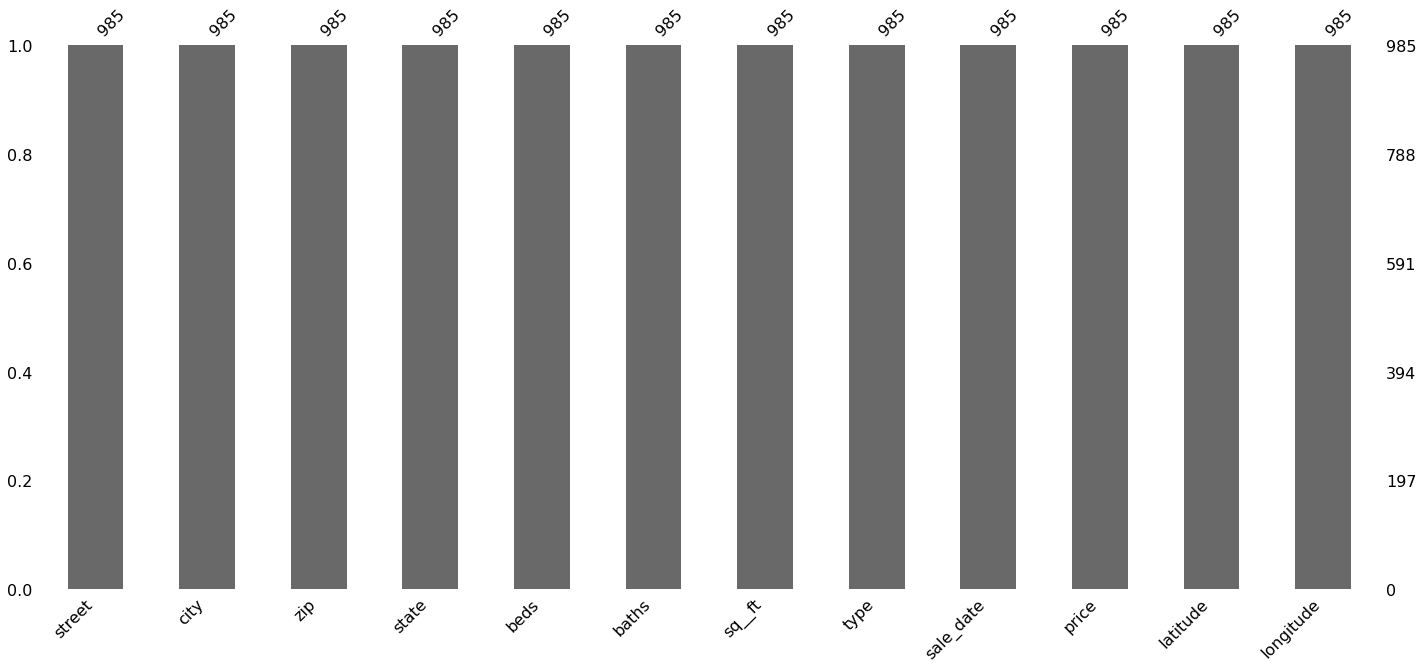

In [168]:
msno.bar(df);

In [169]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [170]:
# Looks like there are some negative sqft and price values.
# remove second unferscore from sqft variable
df.rename(columns= {'sq__ft':'sq_ft'}, inplace = True)        

In [171]:
# drop if sq_ft = 0 
df = df[df.sq_ft > 0]

In [172]:
df.shape

(813, 12)

In [173]:
# Feels like zip might be a good predictor of price, but creating 66 dummy variables seems like a lot
df['zip'].nunique()

66

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

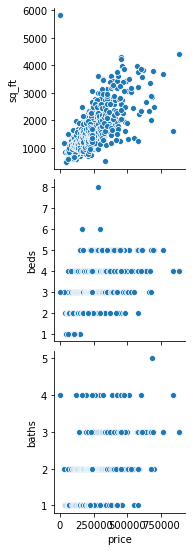

In [174]:
# A: 
features = ['sq_ft','beds','baths']

X = df[features]

sns.pairplot(df, x_vars=['price'], y_vars=features)

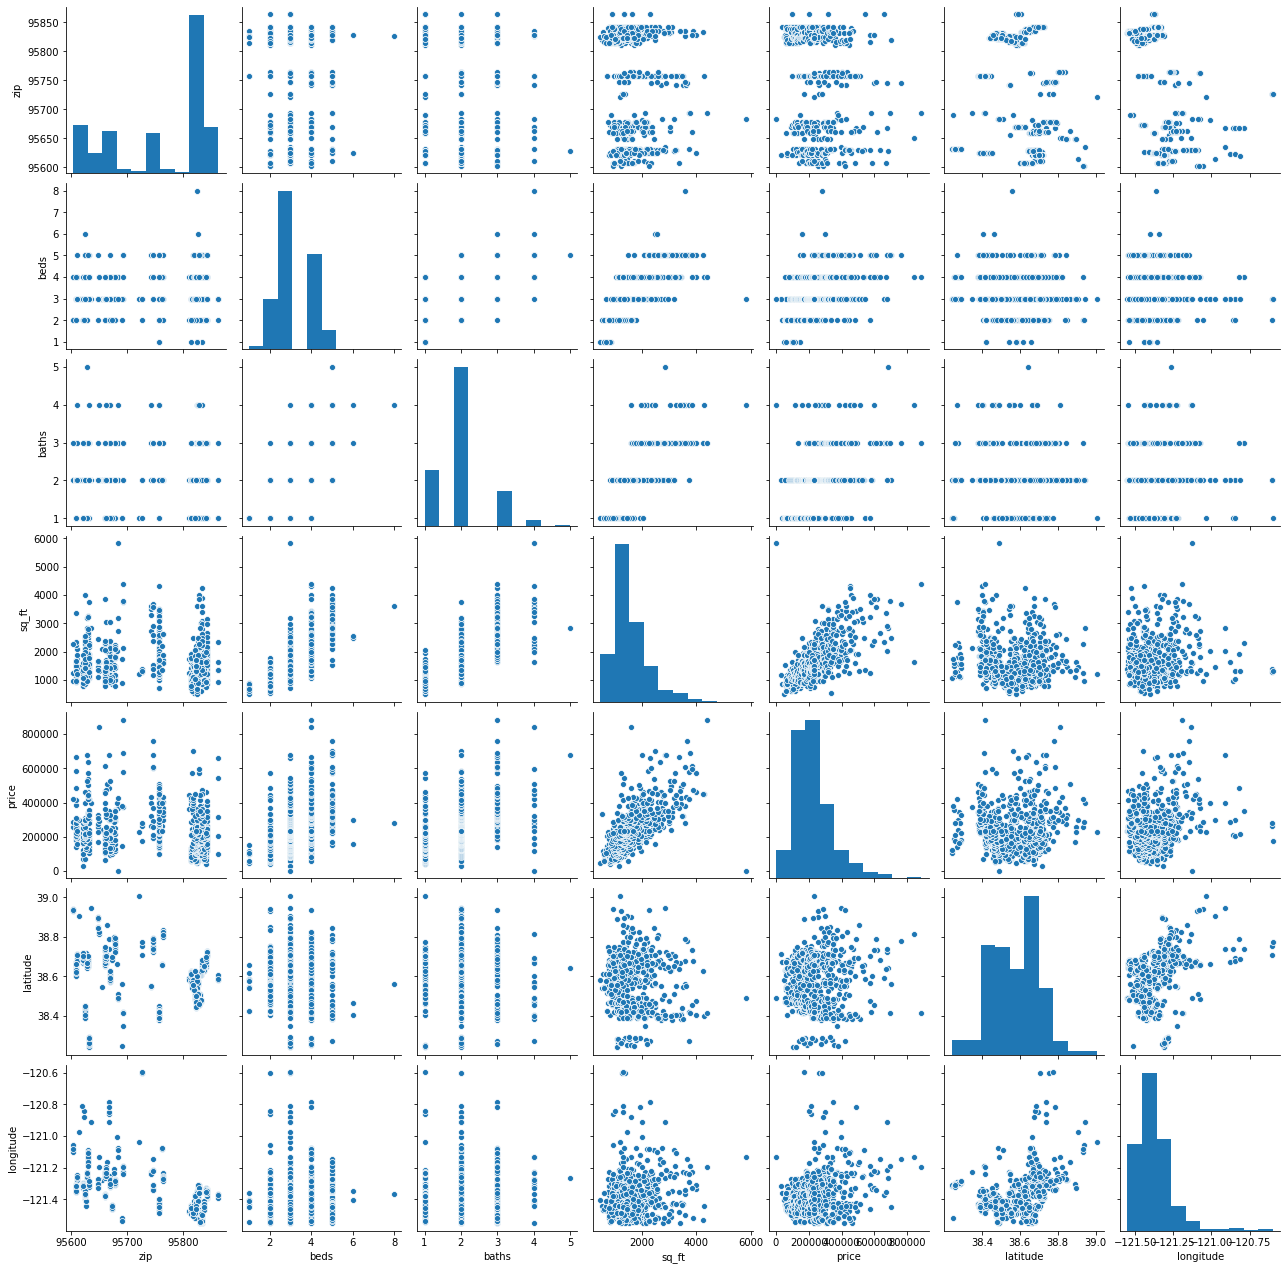

In [175]:
sns.pairplot(df)

In [176]:
df.corr()

,zip,beds,baths,sq_ft,price,latitude,longitude
zip,1.000000,-0.070211,-0.101987,-0.100688,-0.219531,-0.135006,-0.562511
beds,-0.070211,1.000000,0.653718,0.696080,0.443391,-0.105579,0.053598
baths,-0.101987,0.653718,1.000000,0.724306,0.502191,-0.080098,0.106447
sq_ft,-0.100688,0.696080,0.724306,1.000000,0.693902,-0.102558,0.134795
price,-0.219531,0.443391,0.502191,0.693902,1.000000,0.058632,0.278304
latitude,-0.135006,-0.105579,-0.080098,-0.102558,0.058632,1.000000,0.345702
longitude,-0.562511,0.053598,0.106447,0.134795,0.278304,0.345702,1.000000


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [177]:
# A: 

# Based on the data, it seems the variables sq_ft, beds, and baths are the best predictors of price. Sq_ft has a clear positive 
# relationship with price, as indicated by the above scatterplots and correlation matrix. Similarly, though on a smaller scale,
# the number of bedrooms and baths are also positively correlted with price. Some colinearity is expected here, given that sq_ft 
# is probably a function of the number of beds and baths.



### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [178]:
X.shape

(813, 3)

In [179]:

y = df['price']

In [180]:
# A:
def simple_lr (X, y):
    
    lr = LinearRegression()
    lr.fit(X,y)
    inter = lr.intercept_
    slopes = lr.coef_
    
    return (inter, slopes)

simple_lr(X,y)

(48099.44299680012, array([   132.55491321, -11905.82228533,   4597.36113623]))

### 6. Interpret the intercept. Interpret the slope.

In [181]:
# A:

# Slope:

# Intercept: Holding each other variable in the model constant, 
# a 1-unit increase in each explanatory variable (sq_ft, beds, baths)
# is assocaited with an x coefficient value ($132, -$11,905, and $4,597) -unit increase in the dependent variable (price).

# The negative cofficient for beds is quite puzzling. 

# Intercept:

# Since the intercept is the expected mean value of Y when all variables eqaul zero, 
# we would expect a house with zero sq_ft, beds, and baths to cost $48,099.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [182]:
# A: 

# Prediction: Predict price of home based on sq_ft, according to coefficients below. Variable y_pred does this, below. 

# Inference: We could infer that a house with price $X is y sq_ft. This could be used as a mettic for over/under pricing.



### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [183]:
# come back to this later, code can be adapted from 3.01

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [184]:
# A:
#df = pd.get_dummies(df, columns=['type'])
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,street,city,zip,state,beds,baths,sq_ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [185]:
# A:
# The 'Type' observation with a value of 'Unkown' was removed in intial cleaning.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 984
Data columns (total 13 columns):
street               813 non-null object
city                 813 non-null object
zip                  813 non-null int64
state                813 non-null object
beds                 813 non-null int64
baths                813 non-null int64
sq_ft                813 non-null int64
sale_date            813 non-null object
price                813 non-null int64
latitude             813 non-null float64
longitude            813 non-null float64
type_Multi-Family    813 non-null uint8
type_Residential     813 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(2)
memory usage: 117.8+ KB


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```



_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [186]:
# Who is this above? Why are they talking to me? Should I be using their idea?

In [191]:
# A:

lr = LinearRegression()

X = df[['sq_ft', 'beds', 'type_Residential']]
y = df['price']

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

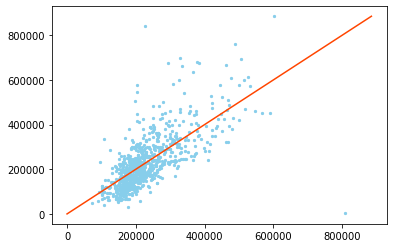

In [195]:
# A:

# Price based on sq_ft:
y_pred = lr.predict(X)

# Scatter of predictions vs actuals
plt.scatter(y_pred, y, s=5, c='skyblue');

# Plot of prefiction line
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'orangered');

# Graph code adapted from GA DSI 3.01 Linear Regression Lecture

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

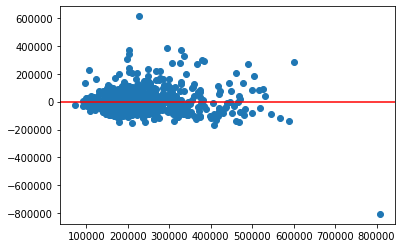

In [209]:
# A:

# Homoskedasticity: based on the below graph, the assumption of Eqality of variances seems to hold--homoskedasticity exists in the distribution of residuals.

# Independence of X (Colinearity of independent variables): Based on the below graph, colinearity may, intuitively, exist between 'sq_ft' and 'beds,' 
# suggesting the model may violate the assumotion of X variable independence.

residuals = y-y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color = 'red');

# Code adapted from GA DSI 3.01 Linear Regression Lecture



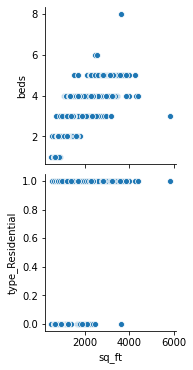

In [213]:
sns.pairplot(df, x_vars=['sq_ft'], y_vars=['beds', 'type_Residential'])


### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [214]:
# A:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [241]:
# A:

def r2_adj(model, df, num_x_vars,):
    
    # Define equation variables
    r2 = metrics.r2_score(y, y_pred) # Not sure how to call y,y_pred from specific model?
    n = df
    k = num_x_vars
    
    # Calculate adj R2
    r2_adj = 1-(((1-r2)*(len(n)-1))/(len(n)-k-1))
    
    # Return adjusted R2
    return r2_adj    
    
r2_adj(lr,df,3)    

0.48885441566111476

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [242]:
# A:

def model_metrics(model, y, y_pred):
    
    # Variables
    y = y
    y_pred = y_pred
    residuals = y - y_pred
    
    # Metrics
    med_abs_err = metrics.median_absolute_error(y, y_pred)
    homog = metrics.homogeneity_score(y, y_pred)
    sse = np.sum((residuals**2))
    mse = metrics.mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y, y_pred)
    
    # Print Metrics
    print(f'Sum Squared Error: {sse}')
    print(f'Median Absolute Error: {med_abs_err}')
    print(f'Mean Squared Error: {mse}')
    print(f'Homogeneity Score: {homog}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-Squared: {r2}')

In [243]:
model_metrics(lr, y, y_pred)

Sum Squared Error: 5944481055372.1
Median Absolute Error: 46722.98768390514
Mean Squared Error: 7311784815.955842
Homogeneity Score: 0.9573323049262416
Root Mean Squared Error: 85508.97506084283
R-Squared: 0.4907428845687708


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [250]:
# A: 

lr2 = LinearRegression()
X2 = df[['sq_ft']]
y2 = df['price']

lr2.fit(X2,y2)

y_pred2 = lr2.predict(X2)

In [251]:
model_metrics(lr2, y2, y_pred2)

Sum Squared Error: 6052376962853.766
Median Absolute Error: 47662.996394407324
Mean Squared Error: 7444498109.2912245
Homogeneity Score: 0.9325625781980735
Root Mean Squared Error: 86281.50502449076
R-Squared: 0.4814995615437454


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# A:

# Given the low r-squared value, the model is likely highly biased.
# That is, there is variability in price for which the explanatory variables 
# in the model do not currently account. As a linear model with a low r-squared, 
# there are likely no issues of overfitting or high variance.



